In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from scipy.special import boxcox1p 


In [3]:
city_abbr = ['smr', 'spb']
cols_str = """price,price_per_m,area,year,bank_1000,bank_500,bus_stop_1000,bus_stop_500,cafe_1000,cafe_500,cinema_1000,cinema_500,distance_to_bus_stop,distance_to_center,distance_to_school,distance_to_subway,floor,floors_total,government_1000,government_500,hospital_1000,hospital_500,hotel_1000,hotel_500,leisure_1000,leisure_500,mean_salaries_1000,mean_salaries_500,median_salaries_1000,median_salaries_500,nightlife_1000,nightlife_500,office_1000,office_500,point_of_interest_1000,point_of_interest_500,rooms,school_1000,school_500,shop_1000,shop_500,subway_station_1000,subway_station_500,tram_stop_1000,tram_stop_500,univercity_1000,univercity_500,vacancy_1000,vacancy_500"""
columnsTitles = cols_str.split(',')

In [4]:
def probplot(data):
    # kernel density plot
    sns.distplot(data.price_per_m,fit=norm);
    plt.ylabel =('Frequency')
    plt.title = ('SalePrice Distribution');
    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data['price_per_m']);
    #QQ plot
    fig = plt.figure()
    res = stats.probplot(data['price_per_m'], plot=plt)
    plt.show()
    print("skewness: %f" % data['price_per_m'].skew())
    print("kurtosis: %f" % data['price_per_m'].kurt())

In [5]:
def probplot_log(data):
    #log transform the target 
    data["price_per_m"] = np.log1p(data["price_per_m"])

    #Kernel Density plot
    sns.distplot(data.price_per_m,fit=norm);
    plt.ylabel=('Frequency')
    plt.title=('price_per_m distribution');
    #Get the fitted parameters used by the function
    (mu,sigma)= norm.fit(data['price_per_m']);
    #QQ plot
    fig =plt.figure()
    res =stats. probplot(data['price_per_m'], plot=plt)
    plt.show()

In [6]:
def corrmap(data):
    corr = data.corr()
    fig, ax = plt.subplots()
    cax = ax.matshow(corr, vmin=-1, vmax=1,cmap=plt.cm.RdBu)
    plt.xticks(range(len(corr.columns)), columnsTitles);
    plt.xticks(rotation=90)
    plt.yticks(range(len(corr.columns)), columnsTitles);
    plt.colorbar(cax)
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    plt.show()

In [7]:
def corrmap10lgst(data, y='price_per_m'):
    cols = data.corr().nlargest(10, y)[y].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                     xticklabels=cols.values,cmap=plt.cm.RdBu)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)


In [8]:
def scatter(df, col_name):
    x = df['price_per_m']
    y = df[col_name]
    fig, ax = plt.subplots()
    plt.scatter(x, y, marker='o')
    plt.xlabel('price_per_m')
    fig.set_size_inches(12.5, 10.5)
    #fig.savefig('test2png.png', dpi=100)
    plt.show()

In [9]:
def normalized(data):
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm = pd.DataFrame(x_scaled)
    norm.columns = columnsTitles
    return norm

In [60]:
def box_transform(data):    
    for c in ['year']:
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(list(data[c].values))
    #shape
    print('Shape data: {}'.format(data.shape))

    #log transform skewed numeric features 
    numeric_features = data.dtypes[data.dtypes != "object"].index

    skewed_features = data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
    #compute skewness
    print ("\skew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_features})   


    skewness = skewness[abs(skewness) > 0.75]
    print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        data[feat] = boxcox1p(data[feat], lam)

    return pd.get_dummies(data)

In [10]:
def linear_regression(data, cols=[]):
    cols = cols if cols else [c for c in spb_data.columns if c not in ['price', 'price_per_m', 'year', 'area']]

    a = ['median_salaries_1000', 'area', 'point_of_interest_1000', 'rooms', 'distance_to_center', 'distance_to_subway']
    X = (data[cols])
    Y = (data['price_per_m'])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)


    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    return lin_model

In [61]:
for abbr in city_abbr:
    df = pd.read_csv(f'./datasets/initial/{abbr}.csv').drop_duplicates()
    df['price'] = df['area'] * df['price_per_m']
    df=df.reindex(columns=columnsTitles)
    print(df['price_per_m'].head())
    
    df.to_csv(f'./datasets/filtered/{abbr}.csv', index=False)

0    50
1    68
2    82
3    74
4    52
Name: price_per_m, dtype: int64
0     87
1    131
2    106
3     91
4    103
Name: price_per_m, dtype: int64


In [62]:
abbr = 'smr'
smr_data = pd.read_csv(f'./datasets/filtered/{abbr}.csv')
smr_data = smr_data[smr_data['median_salaries_1000'] != 0]
smr_data = smr_data[smr_data['price_per_m'] <= 150]
smr_data = smr_data[smr_data['price_per_m'] >= 10]

In [63]:
from math import isnan

In [64]:
abbr = 'spb'
spb_data = pd.read_csv(f'./datasets/filtered/{abbr}.csv')
spb_data = spb_data[spb_data['median_salaries_1000'] != 0]
spb_data['year'] = spb_data['year'].fillna(0)
spb_data = spb_data[spb_data['year'] != 0]
spb_data = spb_data[spb_data['year'] != 1]
spb_data['year'] = spb_data['year'].apply(int).astype(str)
spb_data = spb_data[spb_data['price_per_m'] <= 500]
spb_data = spb_data[spb_data['price_per_m'] >= 10]

In [269]:
a = sorted(spb_data['price'])

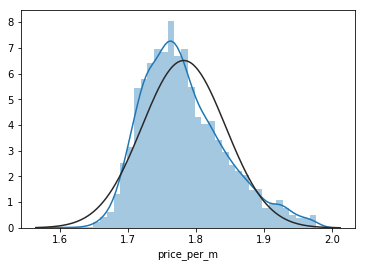

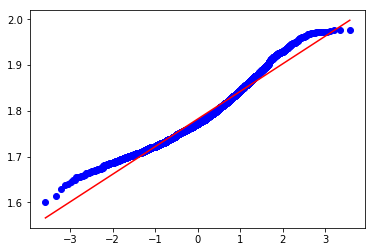

skewness: 0.690158
kurtosis: 0.235574


In [283]:
probplot(spb_data)

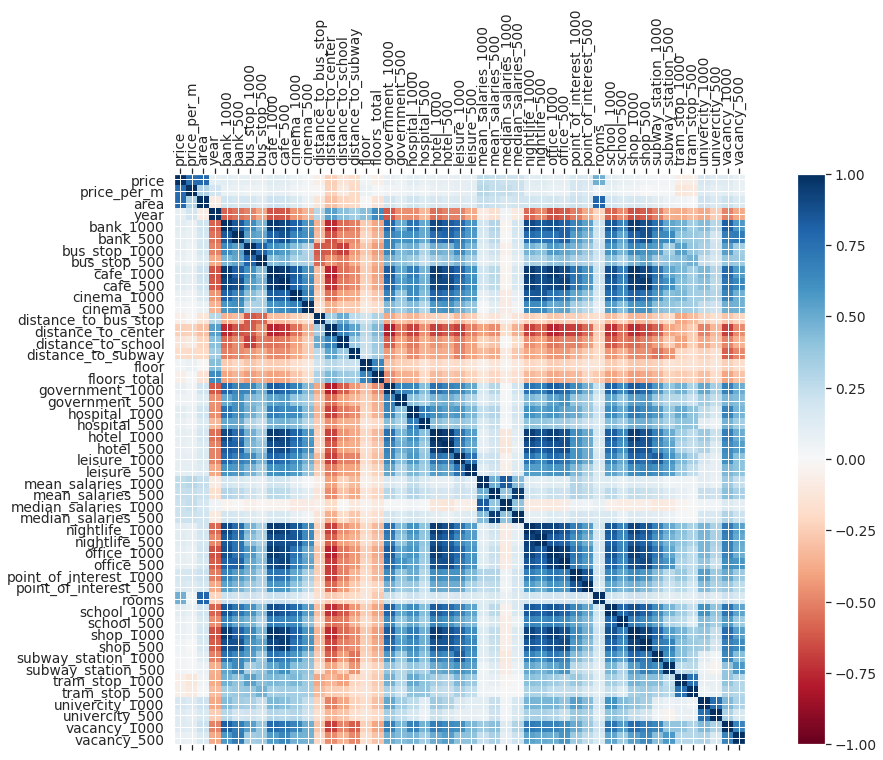

In [338]:
corrmap(spb_data)

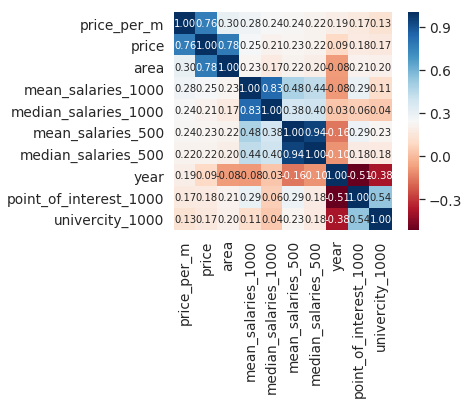

In [339]:
corrmap10lgst(spb_data, 'price_per_m')

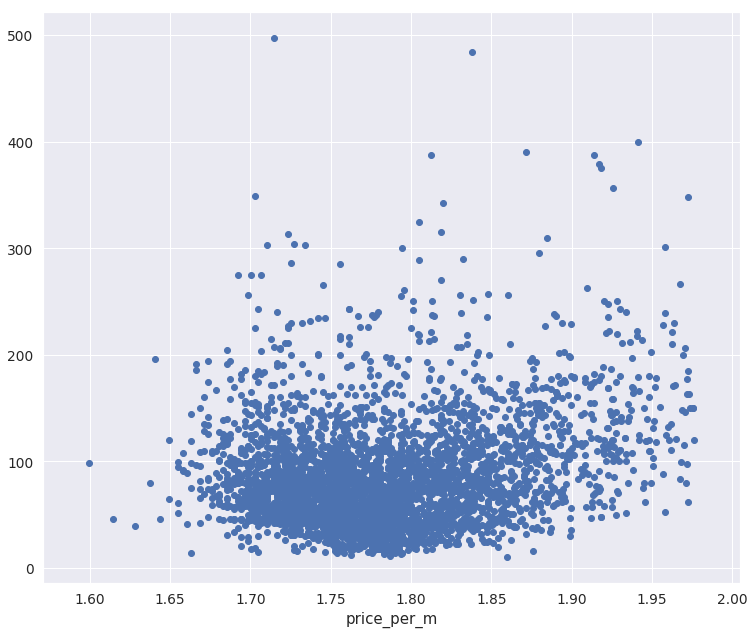

In [318]:
scatter(spb_data, 'area')

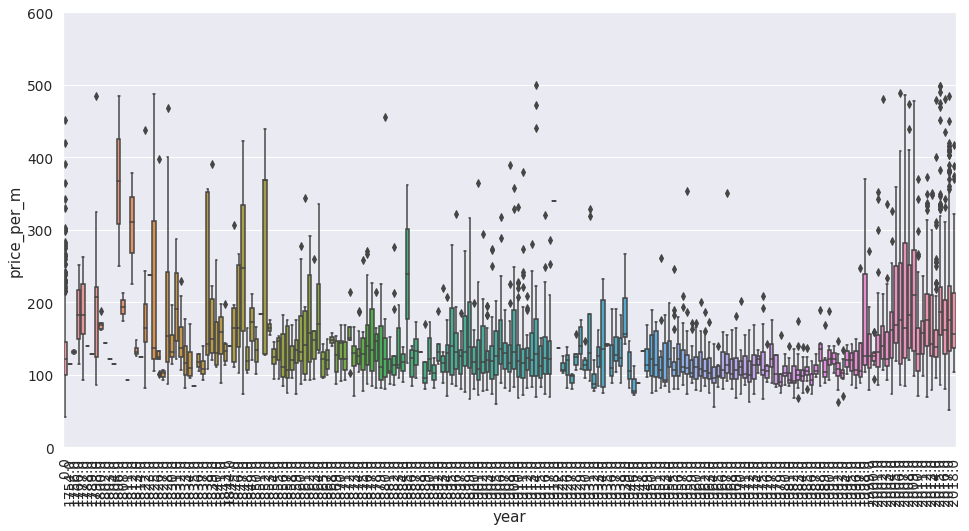

In [354]:
var  = 'year'
data= pd.concat([spb_data['price_per_m'], spb_data[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='price_per_m', data=data)
fig.axis(ymin=0, ymax=600)
plt.xticks(rotation=90);
plt.show();

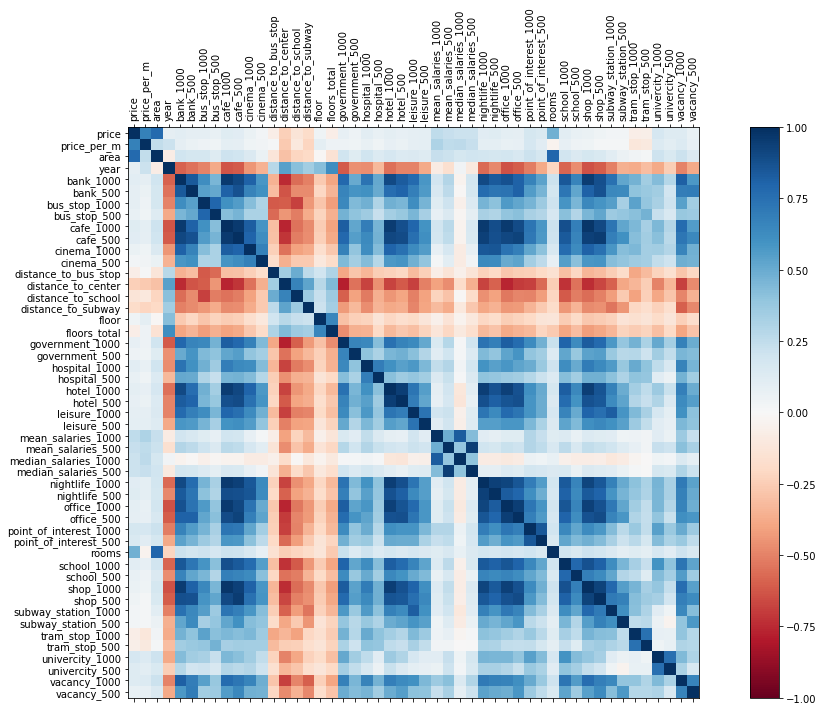

In [173]:
#spb_data = normalized(spb_data)all_

Shape data: (4083, 49)
\skew in numerical features: 

There are 49 skewed numerical features to box cox transform


\skew in numerical features: 

There are 49 skewed numerical features to box cox transform


In [67]:
cols = [c for c in spb_data.columns if c not in ['area', 'price']]
data = box_transform(spb_data)[cols]
train, test, y_train, y_test = train_test_split(data, data['price_per_m'], test_size = 0.2, random_state=42)
ntrain = train.shape[0]
ntest = test.shape[0]


Shape data: (4083, 49)
\skew in numerical features: 

There are 49 skewed numerical features to box cox transform


In [68]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [69]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')

In [70]:

#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.0007 (0.0000)


 GBoost score: 0.0038 (0.0002)



In [71]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0020 (0.0001)



In [72]:

#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [73]:
averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train.values, y_train)

RMSLE score on the train data:
0.0007889569414373674
Accuracy score:


0.9996717436055118

In [75]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['SalePrice'] = ensemble
submit.head()

,SalePrice
0,3.149229
1,2.943889
2,2.955039
3,3.116062
4,2.766449


In [76]:
test['price_per_m'].head()

688     1.422369
873     1.373747
3208    1.374619
3388    1.415623
2895    1.325846
Name: price_per_m, dtype: float64

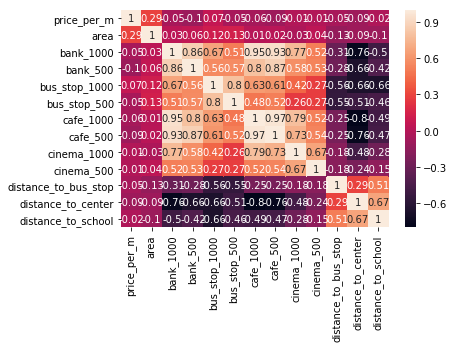

In [24]:

correlation_matrix = spb_data.loc[:, 'price_per_m':'distance_to_school'].corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
.loc[:, 'price_per_m':'distance_to_school']

,price_per_m,area,bank_1000,bank_500,bus_stop_1000,bus_stop_500,cafe_1000,cafe_500,cinema_1000,cinema_500,...,shop_1000,shop_500,subway_station_1000,subway_station_500,tram_stop_1000,tram_stop_500,univercity_1000,univercity_500,vacancy_1000,vacancy_500
0,0.290781,0.325692,0.045455,0.000000,0.487603,0.444444,0.011429,0.005291,0.000000,0.00,...,0.013492,0.005714,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.192308,0.003460
1,0.312682,0.134783,0.121212,0.148148,0.818182,0.622222,0.087619,0.052910,0.000000,0.00,...,0.084127,0.043810,0.000000,0.00,0.541667,0.2,0.727273,0.142857,0.459402,0.467128
2,0.326364,0.207510,0.121212,0.074074,0.512397,0.355556,0.097143,0.058201,0.000000,0.00,...,0.102381,0.043810,0.000000,0.00,0.125000,0.0,0.363636,0.142857,0.076923,0.041522
3,0.208841,0.280632,0.242424,0.037037,0.446281,0.533333,0.209524,0.142857,0.142857,0.00,...,0.142063,0.116190,0.142857,0.25,0.583333,0.6,0.000000,0.000000,0.446581,0.110727
4,0.024418,0.113043,0.484848,0.407407,0.644628,0.577778,0.518095,0.460317,0.142857,0.00,...,0.342857,0.274286,0.428571,0.25,0.000000,0.0,0.090909,0.000000,0.352564,0.169550
5,0.130592,0.000000,0.015152,0.000000,0.487603,0.266667,0.017143,0.010582,0.000000,0.00,...,0.054762,0.034286,0.000000,0.00,0.500000,0.4,0.000000,0.000000,0.064103,0.017301
6,0.076613,0.058893,0.484848,0.407407,0.644628,0.577778,0.518095,0.460317,0.142857,0.00,...,0.342857,0.274286,0.428571,0.25,0.000000,0.0,0.090909,0.000000,0.352564,0.169550
7,0.204061,0.209486,0.287879,0.222222,0.661157,0.511111,0.161905,0.063492,0.142857,0.00,...,0.141270,0.049524,0.000000,0.00,0.500000,0.4,0.090909,0.142857,0.382479,0.145329
8,0.425338,0.114625,0.803030,0.629630,0.801653,0.577778,0.680000,0.693122,0.428571,0.25,...,0.814286,0.655238,0.285714,0.25,0.250000,0.0,0.000000,0.000000,0.728632,0.335640
9,0.359467,0.154150,0.227273,0.000000,0.438017,0.133333,0.110476,0.068783,0.000000,0.00,...,0.069048,0.045714,0.000000,0.00,0.416667,0.0,0.090909,0.142857,0.429487,0.179931


In [26]:
def plot_hists(feature):
    pyplot.hist(spb_dataset[feature], density=True, bins=15)
    pyplot.hist(smr_dataset[feature], density=True, bins=15, color=(1, 1, 0, 0.5))

In [ ]:
spb_dataset.filter()

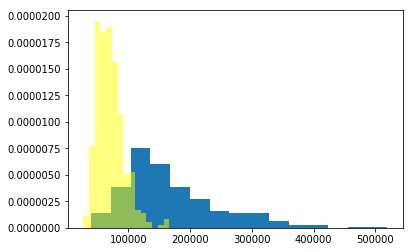

In [40]:
plot_hists('price_per_m')

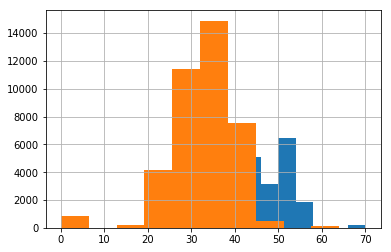

In [14]:
spb_dataset.median_salaries_1000.hist()
smr_dataset.median_salaries_1000.hist()

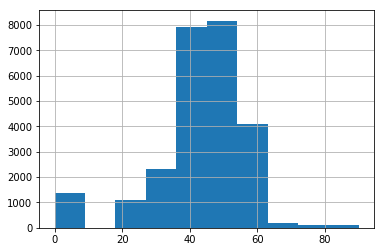

In [8]:
spb_dataset.median_salaries_500.hist()

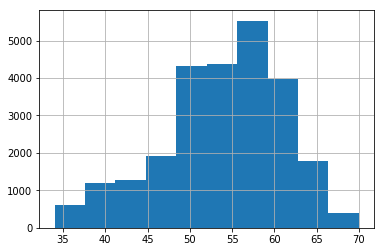

In [9]:
spb_dataset.mean_salaries_1000.hist()

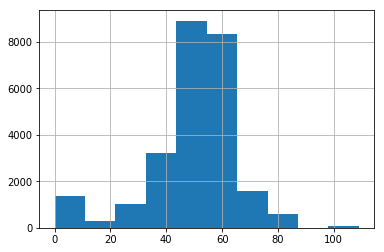

In [10]:
spb_dataset.mean_salaries_500.hist()